<a id="Exercise4"></a>
## Investigate the predictive power of DNA methylation as compared with RNA-seq, in terms of classifying patient samples as either "Primary Tumor" or "Solid Tissue Normal". 

The primary question is: Which data type "performs" better? Two machine learning models are trained: 1 on DNA methylation data, and 1 on gene expression data. The report will investigate which of the two models performed better.

#### There are 2 sets of data from a **specific tissue** with:
1. Gene expression data for samples along with a label of either "Solid Tissue Normal" or "Primary Tumor"
2. DNA methylation beta values for samples along with a label of either "Solid Tissue Normal" or "Primary Tumor"

#### A shared mystery dataset is used 
3. A mystery **DNA methylation** dataset and a mystery **Gene Expression** dataset (for the final testing). This dataset does not specify which tissue (or tissues) the samples come from so may be harder to classify the samples. Samples will have a label of either "Solid Tissue Normal" or "Primary Tumour"   

### Dataset information

1) breast = samples from the breast cancer cohort from TCGA (BRCA)  
2) colon = samples from the colon cancer cohot from TCGA (COAD)  
3) kidney = samples from the kidney cancer cohort from TCGA (KIRC)  
4) liver = samples from the liver cancer cohort from TCGA (LIHC)  
5) lung = samples from the lung cancer cohort from TCGA (LUAD)  

The datasets labelled: dna-meth are the DNA methylation datasets and contain beta values for select CpG probes from the Illumina HumanMethylation450 BeadChip.
The datasets labelled: gene-expr are the gene expression datasets and contain RPKM values for each gene.


The columns of the dataset are the gene names followed by the entrez ID e.g. genename.entrezID (`AADAC.13`),  if the gene doesn't have a name it will be replaced by a dot (e.g. `..100130426` but you can still seach for the entrez id: e.g https://www.ncbi.nlm.nih.gov/gene/100130426). The first column of the dataset is the sample ID e.g. `TCGA.A3.3307.01` and the second column is the label e.g. `Primary Tumor`. The CpGs are labelled by their identifier which you can find information for in the provided annotation file: `CpG_hg19_annot.csv`.

Datasets were downloaded from: http://acgt.cs.tau.ac.il/multi_omic_benchmark/download.html  

Supplemental Papers:  
https://www.nature.com/articles/s41467-020-20430-7  
https://academic.oup.com/nar/article/46/20/10546/5123392  

In [2]:
import pandas as pd

liver_dna_meth = pd.read_csv('G4_liver_dna-meth.csv')
liver_gene_expr = pd.read_csv('G4_liver_gene-expr.csv')

In [3]:
# Liver DNA Meth Summary  
print (f'Shape of clinical data is {liver_dna_meth.shape}\n')
# print (f'The list of columns is - \n   {list(liver_dna_meth.columns)}\n')
# print (f'The summary statistics are -  \n{liver_dna_meth.describe()}')

Shape of clinical data is (427, 5002)



In [4]:
# Liver Gene Exprn Summary  
print (f'Shape of clinical data is {liver_gene_expr.shape}\n')
# print (f'The list of columns is - \n   {list(liver_gene_expr.columns)}\n')
# print (f'The summary statistics are -  \n{liver_gene_expr.describe()}')

Shape of clinical data is (421, 20533)



In [5]:
df_dna_meth = pd.DataFrame(liver_dna_meth)
df_gene_expr = pd.DataFrame(liver_gene_expr)

In [6]:
df_dna_meth.head(20)

Unnamed: 0          Label  cg00005740  cg00012529  cg00013196  \
0   TCGA.2V.A95S.01  Primary Tumor    0.601838    0.374335    0.300235   
1   TCGA.2Y.A9GS.01  Primary Tumor    0.399472    0.395836    0.395846   
2   TCGA.2Y.A9GT.01  Primary Tumor    0.438239    0.640740    0.477210   
3   TCGA.2Y.A9GU.01  Primary Tumor    0.913263    0.969171    0.944687   
4   TCGA.2Y.A9GV.01  Primary Tumor    0.648241    0.805019    0.560080   
5   TCGA.2Y.A9GW.01  Primary Tumor    0.527623    0.589210    0.264239   
6   TCGA.2Y.A9GX.01  Primary Tumor    0.548489    0.525146    0.617167   
7   TCGA.2Y.A9GY.01  Primary Tumor    0.515997    0.385890    0.296859   
8   TCGA.2Y.A9GZ.01  Primary Tumor    0.070236    0.274840    0.182527   
9   TCGA.2Y.A9H0.01  Primary Tumor    0.084853    0.207433    0.251747   
10  TCGA.2Y.A9H1.01  Primary Tumor    0.293279    0.388352    0.161308   
11  TCGA.2Y.A9H2.01  Primary Tumor    0.856640    0.788894    0.485017   
12  TCGA.2Y.A9H3.01  Primary Tumor    0.876247    0.945287    0.909018   
13  TCGA.2Y.A9H4.01  Primary Tumor    0.122365    0.247170    0.312391   
14  TCGA.2Y.A9H5.01  Primary Tumor    0.855391    0.884421    0.885964   
15  TCGA.2Y.A9H6.01  Primary Tumor    0.920400    0.977103    0.914057   
16  TCGA.2Y.A9H7.01  Primary Tumor    0.561417    0.249200    0.192065   
17  TCGA.2Y.A9H8.01  Primary Tumor    0.178606    0.954162    0.569745   
18  TCGA.2Y.A9H9.01  Primary Tumor    0.679719    0.256620    0.178390   
19  TCGA.2Y.A9HA.01  Primary Tumor    0.268590    0.304754    0.195198   

    cg00019366  cg00028598  cg00030627  cg00033551  cg00047815  ...  \
0     0.259656    0.311692    0.331413    0.963102    0.586768  ...   
1     0.380457    0.273681    0.446539    0.952035    0.380159  ...   
2     0.519875    0.377109    0.450508    0.604261    0.558608  ...   
3     0.573213    0.944506    0.934732    0.909746    0.883221  ...   
4     0.914805    0.389027    0.641507    0.218462    0.559733  ...   
5     0.731482    0.507464    0.548916    0.705196    0.586489  ...   
6     0.659116    0.608960    0.652074    0.713259    0.663765  ...   
7     0.285587    0.363974    0.375713    0.970466    0.361428  ...   
8     0.072227    0.078559    0.146439    0.435346    0.132733  ...   
9     0.212951    0.194197    0.227972    0.959520    0.368327  ...   
10    0.281463    0.262280    0.316868    0.965420    0.349884  ...   
11    0.574240    0.965820    0.670333    0.790136    0.708785  ...   
12    0.611507    0.836507    0.866205    0.945422    0.822548  ...   
13    0.245412    0.332905    0.373801    0.566797    0.537103  ...   
14    0.627566    0.877328    0.878691    0.920745    0.452799  ...   
15    0.924254    0.978526    0.930278    0.969996    0.937977  ...   
16    0.146878    0.145364    0.620572    0.959981    0.325559  ...   
17    0.479438    0.863979    0.801872    0.956262    0.928043  ...   
18    0.555954    0.068669    0.174081    0.757245    0.142758  ...   
19    0.153315    0.208791    0.228690    0.834821    0.154150  ...   

    rs7660805  rs7746156  rs798149  rs845016  rs877309  rs9292570  rs9363764  \
0    0.944546   0.959710  0.969422  0.368036  0.513791   0.509061   0.541551   
1    0.334419   0.459250  0.971834  0.933756  0.521390   0.020679   0.573997   
2    0.511502   0.462957  0.018341  0.951748  0.544744   0.025068   0.558837   
3    0.540377   0.487190  0.015734  0.945182  0.020356   0.521952   0.939739   
4    0.948858   0.957963  0.016105  0.940811  0.569243   0.967371   0.518856   
5    0.574784   0.965589  0.021249  0.046591  0.020421   0.972718   0.572149   
6    0.037369   0.457747  0.018850  0.045333  0.504199   0.965891   0.933859   
7    0.385987   0.507226  0.972969  0.612707  0.969806   0.520062   0.950201   
8    0.681162   0.021249  0.424453  0.041440  0.494477   0.967624   0.882643   
9    0.047479   0.483344  0.971264  0.040520  0.019133   0.647875   0.591339   
10   0.495935   0.020531  0.970539  0.509296  0.019498   0.955620   0.589489   
11

In [7]:
df_gene_expr.head(20)

Unnamed: 0          Label  X..100130426  X..100133144  X..100134869  \
0   TCGA.2V.A95S.01  Primary Tumor        0.0000        1.5051        3.7074   
1   TCGA.2Y.A9GS.01  Primary Tumor        0.0000       26.4120        2.6663   
2   TCGA.2Y.A9GT.01  Primary Tumor        0.0000        0.0000        4.4833   
3   TCGA.2Y.A9GU.01  Primary Tumor        0.0000        5.7222        5.1216   
4   TCGA.2Y.A9GV.01  Primary Tumor        0.0000       11.4975        5.4230   
5   TCGA.2Y.A9GW.01  Primary Tumor        0.0000        3.9234        7.5709   
6   TCGA.2Y.A9GX.01  Primary Tumor        0.0000        0.0000        8.4848   
7   TCGA.2Y.A9GY.01  Primary Tumor        0.0000        3.5137        6.1275   
8   TCGA.2Y.A9GZ.01  Primary Tumor        0.7167        3.8225        9.1468   
9   TCGA.2Y.A9H0.01  Primary Tumor        0.0000        3.4345        8.4517   
10  TCGA.2Y.A9H1.01  Primary Tumor        0.0000        0.7285        3.8971   
11  TCGA.2Y.A9H2.01  Primary Tumor        0.0000        5.2549        8.3746   
12  TCGA.2Y.A9H3.01  Primary Tumor        0.0000        2.7171        5.9677   
13  TCGA.2Y.A9H4.01  Primary Tumor        1.2671        0.0000       13.4389   
14  TCGA.2Y.A9H5.01  Primary Tumor        0.0000        1.0549        2.6904   
15  TCGA.2Y.A9H6.01  Primary Tumor        0.0000       11.4729        8.4607   
16  TCGA.2Y.A9H7.01  Primary Tumor        0.0000        5.9463        7.7759   
17  TCGA.2Y.A9H8.01  Primary Tumor        0.0000        8.9961        2.4254   
18  TCGA.2Y.A9H9.01  Primary Tumor        0.0000        6.8062        9.1414   
19  TCGA.2Y.A9HA.01  Primary Tumor        0.0000       15.3853        6.0683   

    X..10357   X..10431  X..136542  X..155060  X..26823  ...  ZXDA.7789  \
0    90.1124  1017.1038        0.0   141.3911    0.6516  ...    24.7597   
1    71.0054   639.2311        0.0   122.7206    1.4786  ...    68.5067   
2    95.5122   742.4344        0.0    95.0460    1.7933  ...    46.6263   
3    61.6679  1186.9807        0.0   280.2709    0.8341  ...    18.3511   
4   104.4670   878.1726        0.0   282.5719    0.0000  ...    41.4552   
5    99.4866   690.4215        0.0    68.9655    0.0000  ...    19.9234   
6    75.0909   680.6061        0.0   124.8485    0.0000  ...    60.6061   
7    45.1098  1199.2501        0.0   224.4242    0.0000  ...    16.6042   
8    87.6928   546.7577        0.0   522.8669    0.6826  ...    48.4642   
9   138.2358  1361.9018        0.0    44.4166    0.6256  ...    43.1655   
10   35.8485  1221.1622        0.0    31.2229    0.0000  ...    16.1897   
11   66.9107   784.4523        0.0   334.6795    0.5048  ...    74.2049   
12   49.6278  1449.1315        0.0   303.9702    0.0000  ...    13.6476   
13  100.3696   830.3336        0.0   306.2155    0.0000  ...    49.9160   
14   54.5693   823.3458        0.0   193.5081    0.6242  ...    45.5680   
15   78.7818  1279.4389        0.0   439.2765    0.0000  ...    29.5312   
16   87.5929  1109.7770        0.0   375.6432    0.5718  ...    25.7290   
17   51.9814  1215.3848        0.0   313.0842    0.0000  ...    25.5305   
18   62.7196   927.8086        0.0   449.9502    0.0000  ...    26.7692   
19   43.2531  1509.6322        0.0    72.2417    0.4378  ...    40.7180   

    ZXDB.158586  ZXDC.79364  ZYG11A.440590  ZYG11B.79699   ZYX.7791  \
0      273.6602    794.2662        18.2440      499.1041  3172.5037   
1      632.8241   1153.7703        71.4638     1000.4929  5301.1336   
2     1219.4575   1133.3782        12.5532     1289.3970  3219.0092   
3      285.2758   1150.2786         9.1755      941.7437  3092.9899   
4      999.1540   1631.9797         4.2301     1380.7107  2902.7073   
5     1646.7433    706.5134        29.8851      747.1264  8466.6667   
6     1597.5758   1190.9091        27.8788     1795.7576  3440.6061   
7      165.5062    995.1794       128.5485      485.8061  3824.3171   
8      443.6860   1317.4061       127.6451     1549.4881  1393.8567   
9      930.2471    630.5912        55.6772

# Normalisation and Standardisation of Data-Set

Missing values (NaNs) can interfere with mathematical operations. Dropping columns ensures we only work with complete data.

In [8]:
# # Drop columns with null values
df_dna_meth_clean = liver_dna_meth.dropna(axis=1)  # Dropping columns with missing values in DNA methylation dataset
df_gene_expr_clean = liver_gene_expr.dropna(axis=1)  # Dropping columns with missing values in gene expression dataset

#### <span style="color:red">**Warning : Pandas set as show all rows and columns, might crash PC**

In [9]:
# Set the display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# See warning below after this

### Checking if either of the dataframes have any null values. 

In [10]:
# Testing
print(f'dna_meth NO changes: {df_dna_meth.equals(df_dna_meth_clean)}')
print(f'gene_expn NO changes: {df_gene_expr.equals(df_gene_expr_clean)}')
print()

# Show the number of missing values per column: DNA Meth
print('Null liver_dna_meth columns')
print(liver_dna_meth.isnull().sum())

# issue here there are no columns with NaN values

dna_meth NO changes: True
gene_expn NO changes: True

Null liver_dna_meth columns
Unnamed: 0    0
Label         0
cg00005740    0
cg00012529    0
cg00013196    0
cg00019366    0
cg00028598    0
cg00030627    0
cg00033551    0
cg00047815    0
cg00049102    0
cg00049709    0
cg00049868    0
cg00054971    0
cg00055764    0
cg00060627    0
cg00068377    0
cg00069815    0
cg00073794    0
cg00084338    0
cg00088507    0
cg00100680    0
cg00102093    0
cg00107982    0
cg00108164    0
cg00110171    0
cg00114913    0
cg00121876    0
cg00123762    0
cg00128425    0
cg00136968    0
cg00145969    0
cg00148513    0
cg00150560    0
cg00160828    0
cg00170037    0
cg00174845    0
cg00177787    0
cg00180684    0
cg00182256    0
cg00186815    0
cg00187686    0
cg00197993    0
cg00211215    0
cg00214250    0
cg00215587    0
cg00224807    0
cg00225603    0
cg00235657    0
cg00251405    0
cg00251767    0
cg00261325    0
cg00270141    0
cg00271096    0
cg00275103    0
cg00287713    0
cg00294538    0
cg0029

In [11]:
# Show the number of missing values per column: Gene Exprn
print('Null liver_gene_expr columns')
print(liver_gene_expr.isnull().sum())

Null liver_gene_expr columns
Unnamed: 0                   0
Label                        0
X..100130426                 0
X..100133144                 0
X..100134869                 0
X..10357                     0
X..10431                     0
X..136542                    0
X..155060                    0
X..26823                     0
X..280660                    0
X..317712                    0
X..340602                    0
X..388795                    0
X..390284                    0
X..391343                    0
X..391714                    0
X..404770                    0
X..441362                    0
X..442388                    0
X..553137                    0
X..57714                     0
X..645851                    0
X..652919                    0
X..653553                    0
X..728045                    0
X..728603                    0
X..728788                    0
X..729884                    0
X..8225                      0
X..90288                     0
A1BG.1    

### Checking the number of ZERO (0) values within the dataframes.

In [12]:
# number of zero values in each column for DNA methylation data
zero_counts_dna = (df_dna_meth == 0).sum()
print("Zero counts for each column in DNA methylation data:")
print(zero_counts_dna)

Zero counts for each column in DNA methylation data:
Unnamed: 0    0
Label         0
cg00005740    0
cg00012529    0
cg00013196    0
cg00019366    0
cg00028598    0
cg00030627    0
cg00033551    0
cg00047815    0
cg00049102    0
cg00049709    0
cg00049868    0
cg00054971    0
cg00055764    0
cg00060627    0
cg00068377    0
cg00069815    0
cg00073794    0
cg00084338    0
cg00088507    0
cg00100680    0
cg00102093    0
cg00107982    0
cg00108164    0
cg00110171    0
cg00114913    0
cg00121876    0
cg00123762    0
cg00128425    0
cg00136968    0
cg00145969    0
cg00148513    0
cg00150560    0
cg00160828    0
cg00170037    0
cg00174845    0
cg00177787    0
cg00180684    0
cg00182256    0
cg00186815    0
cg00187686    0
cg00197993    0
cg00211215    0
cg00214250    0
cg00215587    0
cg00224807    0
cg00225603    0
cg00235657    0
cg00251405    0
cg00251767    0
cg00261325    0
cg00270141    0
cg00271096    0
cg00275103    0
cg00287713    0
cg00294538    0
cg00295794    0
cg00299737    0
cg0

In [13]:
# number of zero values in each column for gene expression data
zero_counts_gene = (df_gene_expr == 0).sum()
print("\nZero counts for each column in gene expression data:")
print(zero_counts_gene)


Zero counts for each column in gene expression data:
Unnamed: 0                     0
Label                          0
X..100130426                 393
X..100133144                  82
X..100134869                  49
X..10357                       0
X..10431                       0
X..136542                    419
X..155060                      0
X..26823                     305
X..280660                    331
X..317712                    420
X..340602                    299
X..388795                    164
X..390284                     12
X..391343                    301
X..391714                    319
X..404770                    416
X..441362                    420
X..442388                    421
X..553137                     14
X..57714                       0
X..645851                     45
X..652919                    287
X..653553                      0
X..728045                    420
X..728603                    409
X..728788                    298
X..729884             

### Calculate the percentage of zero values in each column for gene expression data.

- (as there are no zero value columns for DNA methylation data)

In [14]:
# Calculate the percentage of zero values in each column for gene expression data
zero_percentage_gene = (df_gene_expr == 0).mean() * 100
print("\nPercentage of zero values for each column in gene expression data:")
print(zero_percentage_gene)


Percentage of zero values for each column in gene expression data:
Unnamed: 0                     0.000000
Label                          0.000000
X..100130426                  93.349169
X..100133144                  19.477435
X..100134869                  11.638955
X..10357                       0.000000
X..10431                       0.000000
X..136542                     99.524941
X..155060                      0.000000
X..26823                      72.446556
X..280660                     78.622328
X..317712                     99.762470
X..340602                     71.021378
X..388795                     38.954869
X..390284                      2.850356
X..391343                     71.496437
X..391714                     75.771971
X..404770                     98.812352
X..441362                     99.762470
X..442388                    100.000000
X..553137                      3.325416
X..57714                       0.000000
X..645851                     10.688836
X..652919   

Findings above says column `X..442388` in df_gene_expr has 100% ZERO (0) values, checking actual values of `X..442388`

(As seen from the results, all values in column `X..442388` are ZERO (0))

In [15]:
# Display all values of a specific column 'X..442388' in df_gene_expr
column_values = df_gene_expr['X..442388']
column_values

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
6      0.0
7      0.0
8      0.0
9      0.0
10     0.0
11     0.0
12     0.0
13     0.0
14     0.0
15     0.0
16     0.0
17     0.0
18     0.0
19     0.0
20     0.0
21     0.0
22     0.0
23     0.0
24     0.0
25     0.0
26     0.0
27     0.0
28     0.0
29     0.0
30     0.0
31     0.0
32     0.0
33     0.0
34     0.0
35     0.0
36     0.0
37     0.0
38     0.0
39     0.0
40     0.0
41     0.0
42     0.0
43     0.0
44     0.0
45     0.0
46     0.0
47     0.0
48     0.0
49     0.0
50     0.0
51     0.0
52     0.0
53     0.0
54     0.0
55     0.0
56     0.0
57     0.0
58     0.0
59     0.0
60     0.0
61     0.0
62     0.0
63     0.0
64     0.0
65     0.0
66     0.0
67     0.0
68     0.0
69     0.0
70     0.0
71     0.0
72     0.0
73     0.0
74     0.0
75     0.0
76     0.0
77     0.0
78     0.0
79     0.0
80     0.0
81     0.0
82     0.0
83     0.0
84     0.0
85     0.0
86     0.0
87     0.0
88     0.0
89     0.0
90     0.0

#### <span style="color:green">**Warning Off: Show all option reset**

In [16]:
# Reset show all option, prevents PC crash when displaying df 
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

### Dataframe Normalised - Excluding columns with 90% of values as Zero (0)

If more than 90% of the values is 0 then we eliminate the column

In [17]:
# Filter columns in DNA methylation data that have less than or equal to 90% zero values
df_dna_meth_filtered = df_dna_meth.loc[:, (df_dna_meth == 0).mean() <= 0.90]

# Filter columns in gene expression data that have less than or equal to 90% zero values
df_gene_expr_filtered = df_gene_expr.loc[:, (df_gene_expr == 0).mean() <= 0.90]

In [18]:
# Dataframe df_dna_meth_filtered
print('FILTERED SHAPE DIFFERENCES:')
print()
print(f'df_dna_meth: {df_dna_meth.shape}')
print(f'df_dna_meth_filtered: {df_dna_meth_filtered.shape}')

FILTERED SHAPE DIFFERENCES:

df_dna_meth: (427, 5002)
df_dna_meth_filtered: (427, 5002)


In [19]:
# Dataframe df_gene_expr_filtered
print('FILTERED SHAPE DIFFERENCES:')
print()
print(f'df_gene_expr: {df_gene_expr.shape}')
print(f'df_gene_expr_filtered: {df_gene_expr_filtered.shape}')

FILTERED SHAPE DIFFERENCES:

df_gene_expr: (421, 20533)
df_gene_expr_filtered: (421, 18760)


# Visualisation 
Before and After filtering Percentage of Zero Values per Column

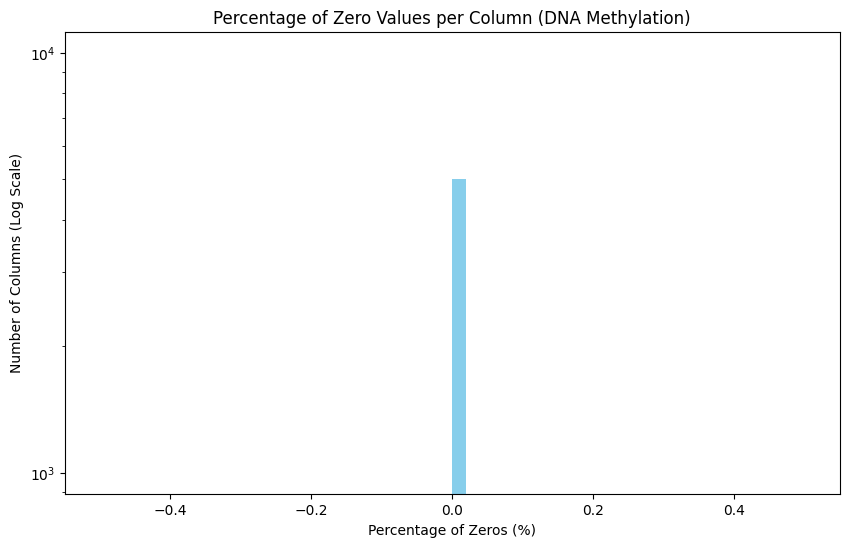

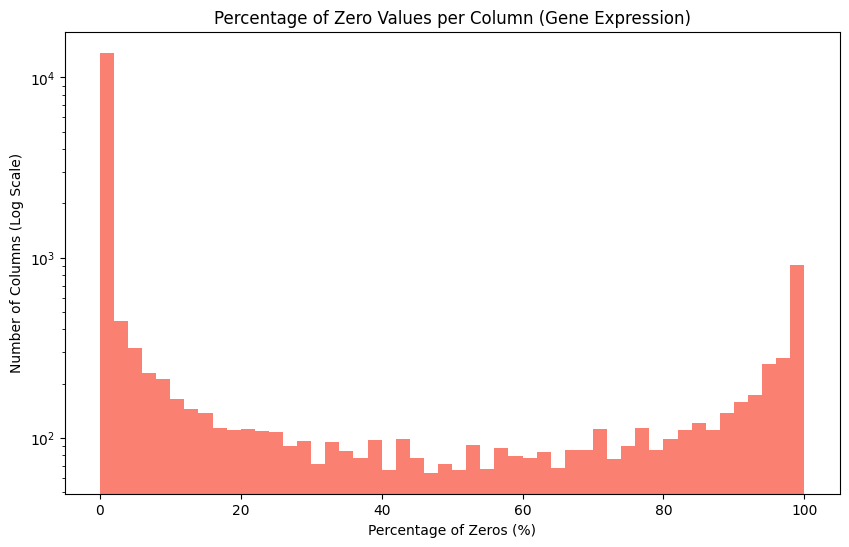

In [20]:
import matplotlib.pyplot as plt

# percentage of zero values for the original data
zero_percentage_dna = (df_dna_meth == 0).mean() * 100
zero_percentage_gene = (df_gene_expr == 0).mean() * 100

# percentage of zeros for DNA methylation data
plt.figure(figsize=(10, 6))
plt.hist(zero_percentage_dna, bins=50, color='skyblue', log=True)  # Log scale
plt.title('Percentage of Zero Values per Column (DNA Methylation)')
plt.xlabel('Percentage of Zeros (%)')
plt.ylabel('Number of Columns (Log Scale)')
plt.show()

# percentage of zeros for gene expression data
plt.figure(figsize=(10, 6))
plt.hist(zero_percentage_gene, bins=50, color='salmon', log=True)  # Log scale
plt.title('Percentage of Zero Values per Column (Gene Expression)')
plt.xlabel('Percentage of Zeros (%)')
plt.ylabel('Number of Columns (Log Scale)')
plt.show()


# Data Scaling
- Scaling is an essential preprocessing step in many machine learning algorithms because it ensures that all features (input variables) have comparable ranges and magnitudes.

#### <span style="color:red">**Warning : Pandas set as show all rows and columns, might crash PC**

In [21]:
# Set the display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

Labels (e.g., 'Primary Tumor', 'Solid Tissue Normal') are categorical and should not be scaled with the features.

In [22]:
# Separate the label column
label_column_dna = df_dna_meth_filtered.iloc[:, 1]  # Extracting the label column from the DNA methylation data
label_column_gene = df_gene_expr_filtered.iloc[:, 1]  # Extracting the label column from the gene expression data

In [23]:
label_column_dna

0            Primary Tumor
1            Primary Tumor
2            Primary Tumor
3            Primary Tumor
4            Primary Tumor
5            Primary Tumor
6            Primary Tumor
7            Primary Tumor
8            Primary Tumor
9            Primary Tumor
10           Primary Tumor
11           Primary Tumor
12           Primary Tumor
13           Primary Tumor
14           Primary Tumor
15           Primary Tumor
16           Primary Tumor
17           Primary Tumor
18           Primary Tumor
19           Primary Tumor
20           Primary Tumor
21           Primary Tumor
22           Primary Tumor
23           Primary Tumor
24           Primary Tumor
25           Primary Tumor
26           Primary Tumor
27           Primary Tumor
28           Primary Tumor
29           Primary Tumor
30           Primary Tumor
31     Solid Tissue Normal
32           Primary Tumor
33     Solid Tissue Normal
34           Primary Tumor
35     Solid Tissue Normal
36           Primary Tumor
3

In [24]:
label_column_gene

0            Primary Tumor
1            Primary Tumor
2            Primary Tumor
3            Primary Tumor
4            Primary Tumor
5            Primary Tumor
6            Primary Tumor
7            Primary Tumor
8            Primary Tumor
9            Primary Tumor
10           Primary Tumor
11           Primary Tumor
12           Primary Tumor
13           Primary Tumor
14           Primary Tumor
15           Primary Tumor
16           Primary Tumor
17           Primary Tumor
18           Primary Tumor
19           Primary Tumor
20           Primary Tumor
21           Primary Tumor
22           Primary Tumor
23           Primary Tumor
24           Primary Tumor
25           Primary Tumor
26           Primary Tumor
27           Primary Tumor
28           Primary Tumor
29           Primary Tumor
30           Primary Tumor
31     Solid Tissue Normal
32           Primary Tumor
33     Solid Tissue Normal
34           Primary Tumor
35           Primary Tumor
36     Solid Tissue Normal
3

#### <span style="color:green">**Warning Off: Show all option reset**

In [25]:
# Reset show all option, prevents PC crash when displaying df 
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

The label column contains target classes and should not be involved in the scaling process as it is not a feature.

In [26]:
# Drop the label column before scaling
features_dna = df_dna_meth_filtered.drop(columns=[df_dna_meth_filtered.columns[1]])  # Dropping the label column from DNA methylation data
features_gene = df_gene_expr_filtered.drop(columns=[df_gene_expr_filtered.columns[1]])  # Dropping the label column from gene expression data

In [27]:
# Set the far left column as the index (assuming it's is an identifier) ---- double check
features_dna.set_index(features_dna.columns[0], inplace=True)
features_gene.set_index(features_gene.columns[0], inplace=True)

In [28]:
features_dna.head()

cg00005740  cg00012529  cg00013196  cg00019366  cg00028598  \
Unnamed: 0                                                                    
TCGA.2V.A95S.01    0.601838    0.374335    0.300235    0.259656    0.311692   
TCGA.2Y.A9GS.01    0.399472    0.395836    0.395846    0.380457    0.273681   
TCGA.2Y.A9GT.01    0.438239    0.640740    0.477210    0.519875    0.377109   
TCGA.2Y.A9GU.01    0.913263    0.969171    0.944687    0.573213    0.944506   
TCGA.2Y.A9GV.01    0.648241    0.805019    0.560080    0.914805    0.389027   

                 cg00030627  cg00033551  cg00047815  cg00049102  cg00049709  \
Unnamed: 0                                                                    
TCGA.2V.A95S.01    0.331413    0.963102    0.586768    0.693580    0.411080   
TCGA.2Y.A9GS.01    0.446539    0.952035    0.380159    0.513627    0.267730   
TCGA.2Y.A9GT.01    0.450508    0.604261    0.558608    0.792885    0.427334   
TCGA.2Y.A9GU.01    0.934732    0.909746    0.883221    0.949313    0.887161   
TCGA.2Y.A9GV.01    0.641507    0.218462    0.559733    0.536288    0.351339   

                 ...  rs7660805  rs7746156  rs798149  rs845016  rs877309  \
Unnamed: 0       ...                                                       
TCGA.2V.A95S.01  ...   0.944546   0.959710  0.969422  0.368036  0.513791   
TCGA.2Y.A9GS.01  ...   0.334419   0.459250  0.971834  0.933756  0.521390   
TCGA.2Y.A9GT.01  ...   0.511502   0.462957  0.018341  0.951748  0.544744   
TCGA.2Y.A9GU.01  ...   0.540377   0.487190  0.015734  0.945182  0.020356   
TCGA.2Y.A9GV.01  ...   0.948858   0.957963  0.016105  0.940811  0.569243   

                 rs9292570  rs9363764  rs939290  rs951295  rs966367  
Unnamed: 0                                                           
TCGA.2V.A95S.01   0.509061   0.541551  0.562851  0.495167  0.048576  
TCGA.2Y.A9GS.01   0.020679   0.573997  0.960284  0.037918  0.473765  
TCGA.2Y.A9GT.01   0.025068   0.558837  0.966630  0.968370  0.948648  
TCGA.2Y.A9GU.01   0.521952   0.939739  0.966117  0.027995  0.949593  
TCGA.2Y.A9GV.01   0.967371   0.518856  0.523212  0.506449  0.037212  

[5 rows x 5000 columns]

In [29]:
features_gene.head()

X..100133144  X..100134869  X..10357   X..10431  X..155060  \
Unnamed: 0                                                                    
TCGA.2V.A95S.01        1.5051        3.7074   90.1124  1017.1038   141.3911   
TCGA.2Y.A9GS.01       26.4120        2.6663   71.0054   639.2311   122.7206   
TCGA.2Y.A9GT.01        0.0000        4.4833   95.5122   742.4344    95.0460   
TCGA.2Y.A9GU.01        5.7222        5.1216   61.6679  1186.9807   280.2709   
TCGA.2Y.A9GV.01       11.4975        5.4230  104.4670   878.1726   282.5719   

                 X..26823  X..280660  X..340602  X..388795  X..390284  ...  \
Unnamed: 0                                                             ...   
TCGA.2V.A95S.01    0.6516     0.0000     0.0000     1.9547     3.9094  ...   
TCGA.2Y.A9GS.01    1.4786     0.0000    10.3499     0.0000     1.9714  ...   
TCGA.2Y.A9GT.01    1.7933     0.8967     0.0000     0.8967     3.5866  ...   
TCGA.2Y.A9GU.01    0.8341     0.0000     0.0000     0.0000     4.1707  ...   
TCGA.2Y.A9GV.01    0.0000     0.0000     0.0000     0.8460     1.6920  ...   

                 ZXDA.7789  ZXDB.158586  ZXDC.79364  ZYG11A.440590  \
Unnamed: 0                                                           
TCGA.2V.A95S.01    24.7597     273.6602    794.2662        18.2440   
TCGA.2Y.A9GS.01    68.5067     632.8241   1153.7703        71.4638   
TCGA.2Y.A9GT.01    46.6263    1219.4575   1133.3782        12.5532   
TCGA.2Y.A9GU.01    18.3511     285.2758   1150.2786         9.1755   
TCGA.2Y.A9GV.01    41.4552     999.1540   1631.9797         4.2301   

                 ZYG11B.79699   ZYX.7791  ZZEF1.23140  ZZZ3.26009  \
Unnamed: 0                                                          
TCGA.2V.A95S.01      499.1041  3172.5037     890.0472    510.1808   
TCGA.2Y.A9GS.01     1000.4929  5301.1336     755.5446    860.5224   
TCGA.2Y.A9GT.01     1289.3970  3219.0092     860.7935    523.6494   
TCGA.2Y.A9GU.01      941.7437  3092.9899    1339.6283    343.6655   
TCGA.2Y.A9GV.01     1380.7107  2902.7073     575.2961    665.8206   

                 psiTPTE22.387590  tAKR.389932  
Unnamed: 0                                      
TCGA.2V.A95S.01            3.9094       6.5157  
TCGA.2Y.A9GS.01            6.4071     482.9966  
TCGA.2Y.A9GT.01           14.3466      83.3894  
TCGA.2Y.A9GU.01            2.5024       2.5024  
TCGA.2Y.A9GV.01            2.5381     119.2893  

[5 rows x 18758 columns]

Some columns may contain non-numeric data (such as strings), which can cause issues when performing mathematical operations.


In [30]:
# Ensure that only numeric columns are selected for scaling
# pd.to_numeric will attempt to convert the columns to numeric types, coercing invalid values to NaN.
features_dna = features_dna.apply(pd.to_numeric, errors='coerce')  # Convert DNA methylation data to numeric (NaN for invalid values)
features_gene = features_gene.apply(pd.to_numeric, errors='coerce')  # Convert gene expression data to numeric (NaN for invalid values)

After converting non-numeric values to NaN, we need to drop columns that still have NaN values.

- (There are no Nan values found via testing, no columns removed)

In [31]:
# Re-drop any columns that still contain non-numeric values after conversion
features_dna = features_dna.dropna(axis=1)  # Drop any remaining non-numeric (NaN) columns in DNA methylation data
features_gene = features_gene.dropna(axis=1)  # Drop any remaining non-numeric (NaN) columns in gene expression data

In [32]:
features_gene.head()

X..100133144  X..100134869  X..10357   X..10431  X..155060  \
Unnamed: 0                                                                    
TCGA.2V.A95S.01        1.5051        3.7074   90.1124  1017.1038   141.3911   
TCGA.2Y.A9GS.01       26.4120        2.6663   71.0054   639.2311   122.7206   
TCGA.2Y.A9GT.01        0.0000        4.4833   95.5122   742.4344    95.0460   
TCGA.2Y.A9GU.01        5.7222        5.1216   61.6679  1186.9807   280.2709   
TCGA.2Y.A9GV.01       11.4975        5.4230  104.4670   878.1726   282.5719   

                 X..26823  X..280660  X..340602  X..388795  X..390284  ...  \
Unnamed: 0                                                             ...   
TCGA.2V.A95S.01    0.6516     0.0000     0.0000     1.9547     3.9094  ...   
TCGA.2Y.A9GS.01    1.4786     0.0000    10.3499     0.0000     1.9714  ...   
TCGA.2Y.A9GT.01    1.7933     0.8967     0.0000     0.8967     3.5866  ...   
TCGA.2Y.A9GU.01    0.8341     0.0000     0.0000     0.0000     4.1707  ...   
TCGA.2Y.A9GV.01    0.0000     0.0000     0.0000     0.8460     1.6920  ...   

                 ZXDA.7789  ZXDB.158586  ZXDC.79364  ZYG11A.440590  \
Unnamed: 0                                                           
TCGA.2V.A95S.01    24.7597     273.6602    794.2662        18.2440   
TCGA.2Y.A9GS.01    68.5067     632.8241   1153.7703        71.4638   
TCGA.2Y.A9GT.01    46.6263    1219.4575   1133.3782        12.5532   
TCGA.2Y.A9GU.01    18.3511     285.2758   1150.2786         9.1755   
TCGA.2Y.A9GV.01    41.4552     999.1540   1631.9797         4.2301   

                 ZYG11B.79699   ZYX.7791  ZZEF1.23140  ZZZ3.26009  \
Unnamed: 0                                                          
TCGA.2V.A95S.01      499.1041  3172.5037     890.0472    510.1808   
TCGA.2Y.A9GS.01     1000.4929  5301.1336     755.5446    860.5224   
TCGA.2Y.A9GT.01     1289.3970  3219.0092     860.7935    523.6494   
TCGA.2Y.A9GU.01      941.7437  3092.9899    1339.6283    343.6655   
TCGA.2Y.A9GV.01     1380.7107  2902.7073     575.2961    665.8206   

                 psiTPTE22.387590  tAKR.389932  
Unnamed: 0                                      
TCGA.2V.A95S.01            3.9094       6.5157  
TCGA.2Y.A9GS.01            6.4071     482.9966  
TCGA.2Y.A9GT.01           14.3466      83.3894  
TCGA.2Y.A9GU.01            2.5024       2.5024  
TCGA.2Y.A9GV.01            2.5381     119.2893  

[5 rows x 18758 columns]

# Min-Max scaling
Min-Max scaling is used to normalize features, bringing all feature values to the range [0, 1]. This is important for algorithms that rely on distance-based metrics or gradient-based optimization, ensuring that all features contribute equally to the model.

In [33]:
# Min-Max Scaling Function
def min_max_scaling(df):
    return (df - df.min()) / (df.max() - df.min())  # Normalize each column based on the formula: (X - min) / (max - min)

We now scale the numerical features for both datasets, ensuring all features have values between 0 and 1.

In [34]:
# Apply Min-Max scaling manually to the features
features_dna_scaled = min_max_scaling(features_dna)  # Apply Min-Max scaling to DNA methylation data
features_gene_scaled = min_max_scaling(features_gene)  # Apply Min-Max scaling to gene expression data

After scaling, we convert the arrays back into DataFrames with the same column names for easy reference and manipulation.

In [35]:
# Convert back to DataFrames
df_dna_meth_scaled = pd.DataFrame(features_dna_scaled, columns=features_dna.columns)  # DNA methylation scaled data
df_gene_expr_scaled = pd.DataFrame(features_gene_scaled, columns=features_gene.columns)  # Gene expression scaled data

In [36]:
df_dna_meth_scaled

cg00005740  cg00012529  cg00013196  cg00019366  cg00028598  \
Unnamed: 0                                                                    
TCGA.2V.A95S.01    0.600162    0.338312    0.271824    0.235925    0.300400   
TCGA.2Y.A9GS.01    0.384143    0.361602    0.377362    0.368220    0.260717   
TCGA.2Y.A9GT.01    0.425526    0.626885    0.467174    0.520904    0.368698   
TCGA.2Y.A9GU.01    0.932597    0.982646    0.983190    0.579317    0.961076   
TCGA.2Y.A9GV.01    0.649695    0.804834    0.558648    0.953412    0.381141   
...                     ...         ...         ...         ...         ...   
TCGA.ZP.A9D4.01    0.517752    0.434908    0.300412    0.430701    0.024787   
TCGA.ZS.A9CD.01    0.857577    0.721891    0.435285    0.774583    0.334640   
TCGA.ZS.A9CE.01    0.048818    0.323185    0.238368    0.171168    0.029649   
TCGA.ZS.A9CF.01    0.347876    0.303135    0.096036    0.489761    0.075068   
TCGA.ZS.A9CG.01    0.512229    0.741409    0.226147    0.462729    0.482078   

                 cg00030627  cg00033551  cg00047815  cg00049102  cg00049709  \
Unnamed: 0                                                                    
TCGA.2V.A95S.01    0.299682    0.975890    0.584412    0.702489    0.394948   
TCGA.2Y.A9GS.01    0.427779    0.964376    0.356833    0.504542    0.237565   
TCGA.2Y.A9GT.01    0.432196    0.602562    0.553393    0.811724    0.412794   
TCGA.2Y.A9GU.01    0.970975    0.920380    0.910955    0.983795    0.917637   
TCGA.2Y.A9GV.01    0.644714    0.201187    0.554633    0.529469    0.329359   
...                     ...         ...         ...         ...         ...   
TCGA.ZP.A9D4.01    0.029078    0.099319    0.484197    0.179843    0.357472   
TCGA.ZS.A9CD.01    0.587199    0.983647    0.756477    0.855379    0.737721   
TCGA.ZS.A9CE.01    0.050979    0.139494    0.118564    0.243147    0.100035   
TCGA.ZS.A9CF.01    0.103433    0.416281    0.228094    0.087460    0.120741   
TCGA.ZS.A9CG.01    0.280443    0.183304    0.628055    0.750695    0.688556   

                 ...  rs7660805  rs7746156  rs798149  rs845016  rs877309  \
Unnamed: 0       ...                                                       
TCGA.2V.A95S.01  ...   0.967410   0.985186  0.989047  0.363165  0.521047   
TCGA.2Y.A9GS.01  ...   0.325000   0.462109  0.991536  0.970821  0.528924   
TCGA.2Y.A9GT.01  ...   0.511454   0.465983  0.007717  0.990147  0.553132   
TCGA.2Y.A9GU.01  ...   0.541856   0.491311  0.005027  0.983095  0.009557   
TCGA.2Y.A9GV.01  ...   0.971949   0.983361  0.005410  0.978399  0.578528   
...              ...        ...        ...       ...       ...       ...   
TCGA.ZP.A9D4.01  ...   0.970402   0.492511  0.460769  0.062057  0.007304   
TCGA.ZS.A9CD.01  ...   0.966792   0.434751  0.007120  0.044780  0.513782   
TCGA.ZS.A9CE.01  ...   0.062899   0.506161  0.006222  0.928757  0.004912   
TCGA.ZS.A9CF.01  ...   0.558340   0.008792  0.008152  0.006640  0.991437   
TCGA.ZS.A9CG.01  ...   0.566298   0.004801  0.984071  0.354342  0.525133   

                 rs9292570  rs9363764  rs939290  rs951295  rs966367  
Unnamed: 0                                                           
TCGA.2V.A95S.01   0.512896   0.552372  0.567858  0.491999  0.027110  
TCGA.2Y.A9GS.01   0.005010   0.586706  0.981877  0.011278  0.479466  
TCGA.2Y.A9GT.01   0.009575   0.570663  0.988486  0.989495  0.984691  
TCGA.2Y.A9GU.01   0.526302   0.973738  0.987953  0.000844  0.985696  
TCGA.2Y.A9GV.01   0.989508   0.528356  0.526565  0.503861  0.015021  
...                    ...        ...       ...       ...       ...  
TCGA.ZP.A9D4.01   0.007343   0.660643  0.978199  0.984509  0.500324  
TCGA.ZS.A9CD.01   0.520101   0.022726  0.017808  0.010108  0.933080  
TCGA.ZS.A9CE.01   0.986804   0.616748  0.421082  0.500830  0.561969  
TCGA.ZS.A9CF.01   0.992396   0.944937  0.985039  0.860572  0.474362  
TCGA.ZS.A9CG.01   0.517290   0.049250  0.260021  0.969714  0.540990  

[427 rows x 5000 columns]

In [37]:
df_gene_expr_scaled

X..100133144  X..100134869  X..10357  X..10431  X..155060  \
Unnamed: 0                                                                   
TCGA.2V.A95S.01      0.033311      0.119451  0.288698  0.248047   0.108050   
TCGA.2Y.A9GS.01      0.584548      0.085907  0.207419  0.102558   0.093138   
TCGA.2Y.A9GT.01      0.000000      0.144450  0.311668  0.142294   0.071035   
TCGA.2Y.A9GU.01      0.126643      0.165016  0.167698  0.313453   0.218972   
TCGA.2Y.A9GV.01      0.254462      0.174727  0.349760  0.194555   0.220810   
...                       ...           ...       ...       ...        ...   
TCGA.ZP.A9D4.01      0.022285      0.222724  0.208598  0.120200   0.014550   
TCGA.ZS.A9CD.01      0.093450      0.057612  0.180003  0.275306   0.028126   
TCGA.ZS.A9CE.01      0.000000      0.282009  0.181826  0.287377   0.023085   
TCGA.ZS.A9CF.01      0.162444      0.318642  0.355795  0.066067   0.204841   
TCGA.ZS.A9CG.01      0.000000      0.265045  0.148545  0.209855   0.072322   

                 X..26823  X..280660  X..340602  X..388795  X..390284  ...  \
Unnamed: 0                                                             ...   
TCGA.2V.A95S.01  0.121647   0.000000   0.000000   0.059994   0.208146  ...   
TCGA.2Y.A9GS.01  0.276038   0.000000   0.005644   0.000000   0.104962  ...   
TCGA.2Y.A9GT.01  0.334790   0.014842   0.000000   0.027522   0.190959  ...   
TCGA.2Y.A9GU.01  0.155717   0.000000   0.000000   0.000000   0.222058  ...   
TCGA.2Y.A9GV.01  0.000000   0.000000   0.000000   0.025965   0.090086  ...   
...                   ...        ...        ...        ...        ...  ...   
TCGA.ZP.A9D4.01  0.000000   0.000000   0.000000   0.034725   0.210830  ...   
TCGA.ZS.A9CD.01  0.000000   0.000000   0.000000   0.069177   0.080002  ...   
TCGA.ZS.A9CE.01  0.000000   0.000000   0.000000   0.050369   0.262134  ...   
TCGA.ZS.A9CF.01  0.000000   0.000000   0.000000   0.000000   0.073389  ...   
TCGA.ZS.A9CG.01  0.000000   0.000000   0.000000   0.021039   0.072995  ...   

                 ZXDA.7789  ZXDB.158586  ZXDC.79364  ZYG11A.440590  \
Unnamed: 0                                                           
TCGA.2V.A95S.01   0.191751     0.056951    0.312726       0.044944   
TCGA.2Y.A9GS.01   0.530550     0.137418    0.507376       0.176050   
TCGA.2Y.A9GT.01   0.361097     0.268847    0.496335       0.030925   
TCGA.2Y.A9GU.01   0.142120     0.059553    0.505485       0.022604   
TCGA.2Y.A9GV.01   0.321050     0.219490    0.766296       0.010421   
...                    ...          ...         ...            ...   
TCGA.ZP.A9D4.01   0.319812     0.174213    0.427870       0.005574   
TCGA.ZS.A9CD.01   0.232742     0.276405    0.301674       0.018508   
TCGA.ZS.A9CE.01   0.258432     0.051405    0.411086       0.071425   
TCGA.ZS.A9CF.01   0.432326     0.294102    0.672262       0.135823   
TCGA.ZS.A9CG.01   0.265449     0.048934    0.346638       0.221228   

                 ZYG11B.79699  ZYX.7791  ZZEF1.23140  ZZZ3.26009  \
Unnamed: 0                                                         
TCGA.2V.A95S.01      0.152032  0.187705     0.436530    0.179419   
TCGA.2Y.A9GS.01      0.335806  0.326793     0.355282    0.360938   
TCGA.2Y.A9GT.01      0.441697  0.190744     0.418859    0.186397   
TCGA.2Y.A9GU.01      0.314272  0.182510     0.708106    0.093144   
TCGA.2Y.A9GV.01      0.475166  0.170077     0.246400    0.260059   
...                       ...       ...          ...         ...   
TCGA.ZP.A9D4.01      0.423382  0.136320     0.143551    0.325125   
TCGA.ZS.A9CD.01      0.422920  0.243641     0.282835    0.140083   
TCGA.ZS.A9CE.01      0.292716  0.244492     0.195960    0.214108   
TCGA.ZS.A9CF.01      0.429846  0.057009     0.159494    0.348577   
TCGA.ZS.A9CG.01      0.721376  0.108696     0.279440    0.237588   

                 psiTPTE22.387590  tAKR.389932  
Unnamed: 0                                      
TCGA.2V.A95S.01          0.011158     0.009402  
TCGA.2Y.A9GS.01          0.018288     0.6969

#### Reattaching label
After scaling, we need to reattach the label column to the data for supervised learning tasks, where the model needs both the features and the target labels.

(One fluctuation in column number accounted for. The first column convered to index, thus it is not getting counted)

In [38]:
# Add the label column back to the scaled DataFrames
df_dna_meth_scaled['Label'] = label_column_dna.values  # Add the label column back to the DNA methylation scaled data
df_gene_expr_scaled['Label'] = label_column_gene.values  # Add the label column back to the gene expression scaled data

Printing the first few rows allows us to visually inspect the result and verify that the data has been scaled correctly.

In [39]:
# Output the cleaned and scaled DataFrames
df_dna_meth_scaled.head()

cg00005740  cg00012529  cg00013196  cg00019366  cg00028598  \
Unnamed: 0                                                                    
TCGA.2V.A95S.01    0.600162    0.338312    0.271824    0.235925    0.300400   
TCGA.2Y.A9GS.01    0.384143    0.361602    0.377362    0.368220    0.260717   
TCGA.2Y.A9GT.01    0.425526    0.626885    0.467174    0.520904    0.368698   
TCGA.2Y.A9GU.01    0.932597    0.982646    0.983190    0.579317    0.961076   
TCGA.2Y.A9GV.01    0.649695    0.804834    0.558648    0.953412    0.381141   

                 cg00030627  cg00033551  cg00047815  cg00049102  cg00049709  \
Unnamed: 0                                                                    
TCGA.2V.A95S.01    0.299682    0.975890    0.584412    0.702489    0.394948   
TCGA.2Y.A9GS.01    0.427779    0.964376    0.356833    0.504542    0.237565   
TCGA.2Y.A9GT.01    0.432196    0.602562    0.553393    0.811724    0.412794   
TCGA.2Y.A9GU.01    0.970975    0.920380    0.910955    0.983795    0.917637   
TCGA.2Y.A9GV.01    0.644714    0.201187    0.554633    0.529469    0.329359   

                 ...  rs7746156  rs798149  rs845016  rs877309  rs9292570  \
Unnamed: 0       ...                                                       
TCGA.2V.A95S.01  ...   0.985186  0.989047  0.363165  0.521047   0.512896   
TCGA.2Y.A9GS.01  ...   0.462109  0.991536  0.970821  0.528924   0.005010   
TCGA.2Y.A9GT.01  ...   0.465983  0.007717  0.990147  0.553132   0.009575   
TCGA.2Y.A9GU.01  ...   0.491311  0.005027  0.983095  0.009557   0.526302   
TCGA.2Y.A9GV.01  ...   0.983361  0.005410  0.978399  0.578528   0.989508   

                 rs9363764  rs939290  rs951295  rs966367          Label  
Unnamed: 0                                                               
TCGA.2V.A95S.01   0.552372  0.567858  0.491999  0.027110  Primary Tumor  
TCGA.2Y.A9GS.01   0.586706  0.981877  0.011278  0.479466  Primary Tumor  
TCGA.2Y.A9GT.01   0.570663  0.988486  0.989495  0.984691  Primary Tumor  
TCGA.2Y.A9GU.01   0.973738  0.987953  0.000844  0.985696  Primary Tumor  
TCGA.2Y.A9GV.01   0.528356  0.526565  0.503861  0.015021  Primary Tumor  

[5 rows x 5001 columns]

In [40]:
df_gene_expr_scaled

X..100133144  X..100134869  X..10357  X..10431  X..155060  \
Unnamed: 0                                                                   
TCGA.2V.A95S.01      0.033311      0.119451  0.288698  0.248047   0.108050   
TCGA.2Y.A9GS.01      0.584548      0.085907  0.207419  0.102558   0.093138   
TCGA.2Y.A9GT.01      0.000000      0.144450  0.311668  0.142294   0.071035   
TCGA.2Y.A9GU.01      0.126643      0.165016  0.167698  0.313453   0.218972   
TCGA.2Y.A9GV.01      0.254462      0.174727  0.349760  0.194555   0.220810   
...                       ...           ...       ...       ...        ...   
TCGA.ZP.A9D4.01      0.022285      0.222724  0.208598  0.120200   0.014550   
TCGA.ZS.A9CD.01      0.093450      0.057612  0.180003  0.275306   0.028126   
TCGA.ZS.A9CE.01      0.000000      0.282009  0.181826  0.287377   0.023085   
TCGA.ZS.A9CF.01      0.162444      0.318642  0.355795  0.066067   0.204841   
TCGA.ZS.A9CG.01      0.000000      0.265045  0.148545  0.209855   0.072322   

                 X..26823  X..280660  X..340602  X..388795  X..390284  ...  \
Unnamed: 0                                                             ...   
TCGA.2V.A95S.01  0.121647   0.000000   0.000000   0.059994   0.208146  ...   
TCGA.2Y.A9GS.01  0.276038   0.000000   0.005644   0.000000   0.104962  ...   
TCGA.2Y.A9GT.01  0.334790   0.014842   0.000000   0.027522   0.190959  ...   
TCGA.2Y.A9GU.01  0.155717   0.000000   0.000000   0.000000   0.222058  ...   
TCGA.2Y.A9GV.01  0.000000   0.000000   0.000000   0.025965   0.090086  ...   
...                   ...        ...        ...        ...        ...  ...   
TCGA.ZP.A9D4.01  0.000000   0.000000   0.000000   0.034725   0.210830  ...   
TCGA.ZS.A9CD.01  0.000000   0.000000   0.000000   0.069177   0.080002  ...   
TCGA.ZS.A9CE.01  0.000000   0.000000   0.000000   0.050369   0.262134  ...   
TCGA.ZS.A9CF.01  0.000000   0.000000   0.000000   0.000000   0.073389  ...   
TCGA.ZS.A9CG.01  0.000000   0.000000   0.000000   0.021039   0.072995  ...   

                 ZXDB.158586  ZXDC.79364  ZYG11A.440590  ZYG11B.79699  \
Unnamed: 0                                                              
TCGA.2V.A95S.01     0.056951    0.312726       0.044944      0.152032   
TCGA.2Y.A9GS.01     0.137418    0.507376       0.176050      0.335806   
TCGA.2Y.A9GT.01     0.268847    0.496335       0.030925      0.441697   
TCGA.2Y.A9GU.01     0.059553    0.505485       0.022604      0.314272   
TCGA.2Y.A9GV.01     0.219490    0.766296       0.010421      0.475166   
...                      ...         ...            ...           ...   
TCGA.ZP.A9D4.01     0.174213    0.427870       0.005574      0.423382   
TCGA.ZS.A9CD.01     0.276405    0.301674       0.018508      0.422920   
TCGA.ZS.A9CE.01     0.051405    0.411086       0.071425      0.292716   
TCGA.ZS.A9CF.01     0.294102    0.672262       0.135823      0.429846   
TCGA.ZS.A9CG.01     0.048934    0.346638       0.221228      0.721376   

                 ZYX.7791  ZZEF1.23140  ZZZ3.26009  psiTPTE22.387590  \
Unnamed: 0                                                             
TCGA.2V.A95S.01  0.187705     0.436530    0.179419          0.011158   
TCGA.2Y.A9GS.01  0.326793     0.355282    0.360938          0.018288   
TCGA.2Y.A9GT.01  0.190744     0.418859    0.186397          0.040949   
TCGA.2Y.A9GU.01  0.182510     0.708106    0.093144          0.007143   
TCGA.2Y.A9GV.01  0.170077     0.246400    0.260059          0.007244   
...                   ...          ...         ...               ...   
TCGA.ZP.A9D4.01  0.136320     0.143551    0.325125          0.009688   
TCGA.ZS.A9CD.01  0.243641     0.282835    0.140083          0.019300   
TCGA.ZS.A9CE.01  0.244492     0.195960    0.214108          0.000000   
TCGA.ZS.A9CF.01  0.057009     0.159494    0.348577          0.007868   
TCGA.ZS.A9CG.01  0.108696     0.279440    0.237588          0.015653   

                 tAKR.389932          Label  
Unnamed: 0                                   
TCGA.2V.

In [41]:
df_dna_meth_scaled.columns
df_gene_expr_scaled.columns

Index(['X..100133144', 'X..100134869', 'X..10357', 'X..10431', 'X..155060',
       'X..26823', 'X..280660', 'X..340602', 'X..388795', 'X..390284',
       ...
       'ZXDB.158586', 'ZXDC.79364', 'ZYG11A.440590', 'ZYG11B.79699',
       'ZYX.7791', 'ZZEF1.23140', 'ZZZ3.26009', 'psiTPTE22.387590',
       'tAKR.389932', 'Label'],
      dtype='object', length=18759)

cg19813015: 0.025645128871352448
cg24128045: 0.022128402009275006
cg01221209: 0.017477970022257313
cg01063579: 0.01548654260459706
cg13879483: 0.015478182112930955
cg24311564: 0.01537157703899964
cg13510648: 0.01511767653344548
cg07810282: 0.01461232867996698
cg13945749: 0.0135077535048001
cg24833737: 0.00910698132435618
cg14602220: 0.00893872841730259
cg10256733: 0.008759186181138075
cg11957331: 0.00868165187339765
cg22524061: 0.008416629230308458
cg12297440: 0.008172293837109084
cg24098131: 0.008144932941523622
cg04418647: 0.008108424091444582
cg27099991: 0.00809484147641355
cg25980388: 0.008090547922529367
cg26040583: 0.008047267124539714
cg16600501: 0.00804487708298959
cg22399133: 0.008014878031705606
cg06137123: 0.00798519127930889
cg21181756: 0.007917538708835763
cg27573735: 0.00787985865724378
cg07275221: 0.007847688726305249
cg16035036: 0.0078094951923076625
cg24258712: 0.007782563775706876
cg20196215: 0.007770739064856701
cg03286742: 0.007702486359329486
cg12251828: 0.00769859

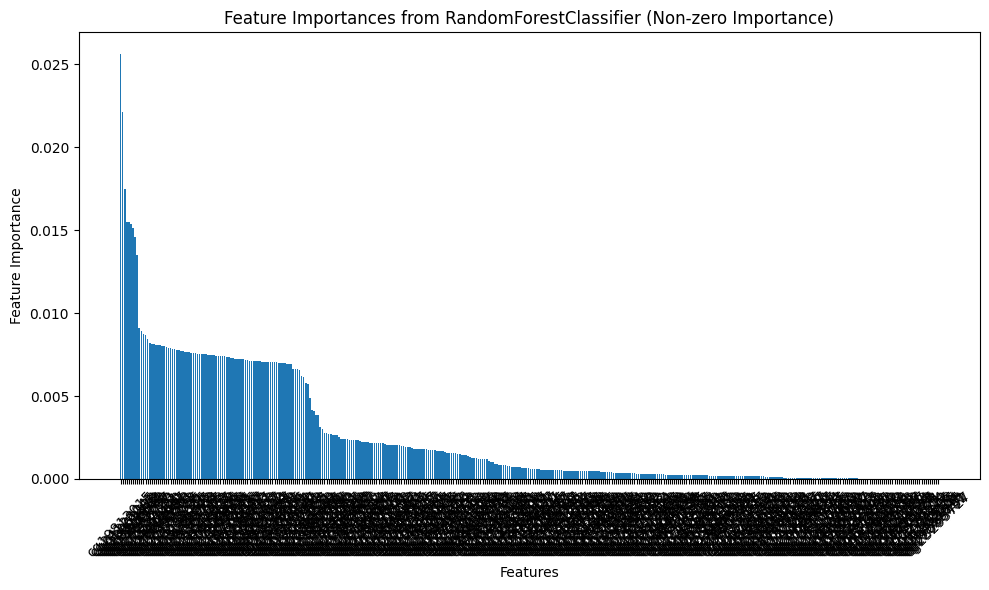

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	5000
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	5000
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	5000
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	5000
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	5000
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	5000
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	5000
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	1689
Rejected: 	3311
Iteration: 	9 / 100
Confirmed: 	336
Tentative: 	1353
Rejected: 	3311
Iteration: 	10 / 100
Confirmed: 	336
Tentative: 	1353
Rejected: 	3311
Iteration: 	11 / 100
Confirmed: 	336
Tentative: 	1353
Rejected: 	3311
Iteration: 	12 / 100
Confirmed: 	373
Tentative: 	939
Rejected: 	3688
Iteration: 	13 / 100
Confirmed: 	373
Tentative: 	939
Rejected: 	3688
Iteration: 	14 / 100
Confirmed: 	373
Tentative: 	939
Rejected: 	3688
Iteration: 	15 / 100
Confirmed: 	373
Tentative: 	939
Rejected: 	3688


BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                          n_estimators=674, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x7F9089586D40),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7F9089586D40, verbose=2)

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from boruta import BorutaPy

# store values for liver cancer status (Y)
status_dmeth = df_dna_meth_scaled['Label'].values
status_rseq = df_gene_expr_scaled['Label'].values

# Encoding categorical data as 0 = healthy 1 = cancer (X)
labelencoder = LabelEncoder()
encoded_status_dmeth = labelencoder.fit_transform(status_dmeth)
encoded_status_rseq = labelencoder.fit_transform(status_rseq)


# store values for (epi)genetic data
numeric_only_d = liver_dna_meth.select_dtypes(include=['number'])
numeric_only_r = liver_gene_expr.select_dtypes(include=['number'])
dmeth = liver_dna_meth[numeric_only_d.columns]
rseq = liver_gene_expr[numeric_only_r.columns]

# split into training and testing datasets
dmeth_train, dmeth_test, status_dmeth_train, status_dmeth_test = train_test_split(dmeth, encoded_status_dmeth, test_size=0.33, random_state=42)
rseq_train, rseq_test, status_rseq_train, status_rseq_test = train_test_split(rseq, encoded_status_rseq, test_size=0.33, random_state=42)

'''
print (f'X train shape is    {X_train.shape}')
print (f'y train shape is    {y_train.shape}')
print (f'X test shape is     {X_test.shape}')
print (f'y test shape is     {y_test.shape}')
'''

# start with random forest classifier

forest = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
forest.fit(dmeth_train, status_dmeth_train)

feature_importances = forest.feature_importances_

# Sort the features by importance in descending order
sorted_indices = feature_importances.argsort()[::-1]

non_zero_indices = sorted_indices[feature_importances[sorted_indices] > 0]

feature_names = dmeth.columns.tolist()

# Print the feature importances
for idx in non_zero_indices:
    print(f"{feature_names[idx]}: {feature_importances[idx]}")

# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(non_zero_indices)), feature_importances[non_zero_indices])
plt.xticks(range(len(non_zero_indices)), [feature_names[i] for i in non_zero_indices], rotation=45)
plt.xlabel("Features")
plt.ylabel("Feature Importance")
plt.title("Feature Importances from RandomForestClassifier (Non-zero Importance)")
plt.tight_layout()
plt.show()


# define Boruta feature selection method
feat_selector_dmeth = BorutaPy(forest, n_estimators='auto', verbose=2, random_state=1)

# find all relevant features
feat_selector_dmeth.fit(dmeth_train, status_dmeth_train)


In [43]:


# Zip feature names, decision, and rankings 
feature_ranks = list(zip(feature_names, 
                         feat_selector_dmeth.ranking_, 
                         feat_selector_dmeth.support_))

for feat in feature_ranks:
    print('Feature: {:<30} Rank: {},  Keep: {}'.format(feat[0], feat[1], feat[2]))
    

Feature: cg00005740                     Rank: 4288,  Keep: False
Feature: cg00012529                     Rank: 2523,  Keep: False
Feature: cg00013196                     Rank: 4288,  Keep: False
Feature: cg00019366                     Rank: 4288,  Keep: False
Feature: cg00028598                     Rank: 2201,  Keep: False
Feature: cg00030627                     Rank: 1947,  Keep: False
Feature: cg00033551                     Rank: 1,  Keep: True
Feature: cg00047815                     Rank: 3571,  Keep: False
Feature: cg00049102                     Rank: 3959,  Keep: False
Feature: cg00049709                     Rank: 2523,  Keep: False
Feature: cg00049868                     Rank: 2931,  Keep: False
Feature: cg00054971                     Rank: 4288,  Keep: False
Feature: cg00055764                     Rank: 1957,  Keep: False
Feature: cg00060627                     Rank: 4288,  Keep: False
Feature: cg00068377                     Rank: 1545,  Keep: False
Feature: cg00069815          

In [44]:
# import data from CpG_hg19_annot.csv to assign meaning to the CpG probes
dna_meth_info = pd.read_csv("CpG_hg19_annot.csv")

dna_meth_info.head()


/var/folders/w8/45q_16d11b18ycmxzq8hdrjc0000gn/T/ipykernel_3834/426716069.py:2: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  dna_meth_info = pd.read_csv("CpG_hg19_annot.csv")


Unnamed: 0   chr       pos strand        Name  AddressA    AddressB Type  \
0  cg00050873  chrY   9363356      -  cg00050873  32735311  31717405.0    I   
1  cg00212031  chrY  21239348      -  cg00212031  29674443  38703326.0    I   
2  cg00213748  chrY   8148233      -  cg00213748  30703409  36767301.0    I   
3  cg00214611  chrY  15815688      -  cg00214611  69792329  46723459.0    I   
4  cg00455876  chrY   9385539      -  cg00455876  27653438  69732350.0    I   

  NextBase Color  ... UCSC_RefGene_Name  UCSC_RefGene_Accession  \
0        A   Red  ...    TSPY4;FAM197Y2  NM_001164471;NR_001553   
1        T   Red  ...            TTTY14               NR_001543   
2        A   Red  ...               NaN                     NaN   
3        A   Red  ...     TMSB4Y;TMSB4Y     NM_004202;NM_004202   
4        A   Red  ...               NaN                     NaN   

  UCSC_RefGene_Group  Phantom  DMR  Enhancer           HMM_Island  \
0       Body;TSS1500      NaN  NaN       NaN    Y:9973136-9976273   
1             TSS200      NaN  NaN       NaN  Y:19697854-19699393   
2                NaN      NaN  NaN       NaN    Y:8207555-8208234   
3      1stExon;5'UTR      NaN  NaN       NaN  Y:14324883-14325218   
4                NaN      NaN  NaN       NaN    Y:9993394-9995882   

  Regulatory_Feature_Name                Regulatory_Feature_Group  DHS  
0                     NaN                                     NaN  NaN  
1                     NaN                                     NaN  NaN  
2                     NaN                                     NaN  NaN  
3     Y:15815422-15815706  Promoter_Associated_Cell_type_specific  NaN  
4                     NaN                                     NaN  NaN  

[5 rows x 30 columns]

APOF.319: 0.02338802161798096
CDH24.64403: 0.023114405175770587
AMIGO3.386724: 0.01828929413860904
NAAA.27163: 0.016187451278864125
PIAS3.10401: 0.014502596534367203
CXorf36.79742: 0.013786828828035683
GABRD.2563: 0.013609233917779023
COLEC10.10584: 0.010805391362174397
ANGPTL6.83854: 0.010783245378871764
LRAT.9227: 0.010009171306413805
C1RL.51279: 0.009988309029409266
CUL7.9820: 0.009748228022530784
DHX34.9704: 0.009578638069828655
ECM1.1893: 0.009341039320292423
NTF3.4908: 0.009314886131317465
ACADS.35: 0.009218227806255301
CLEC4M.10332: 0.009085755140527252
PKMYT1.9088: 0.009074180227491823
TRIB1.10221: 0.009037322579652058
TAF6.6878: 0.009000828575918517
RASGEF1B.153020: 0.008987118457541927
NVL.4931: 0.008982114467408583
C14orf180.400258: 0.008936927682584975
DHX57.90957: 0.008856461227994874
XRCC1.7515: 0.008828259332237071
FAM189B.10712: 0.008757036801204033
HIGD1B.51751: 0.008743839026788854
CXCL14.9547: 0.008742924879280344
EHMT2.10919: 0.0086859878401708
COL15A1.1306: 0.00865

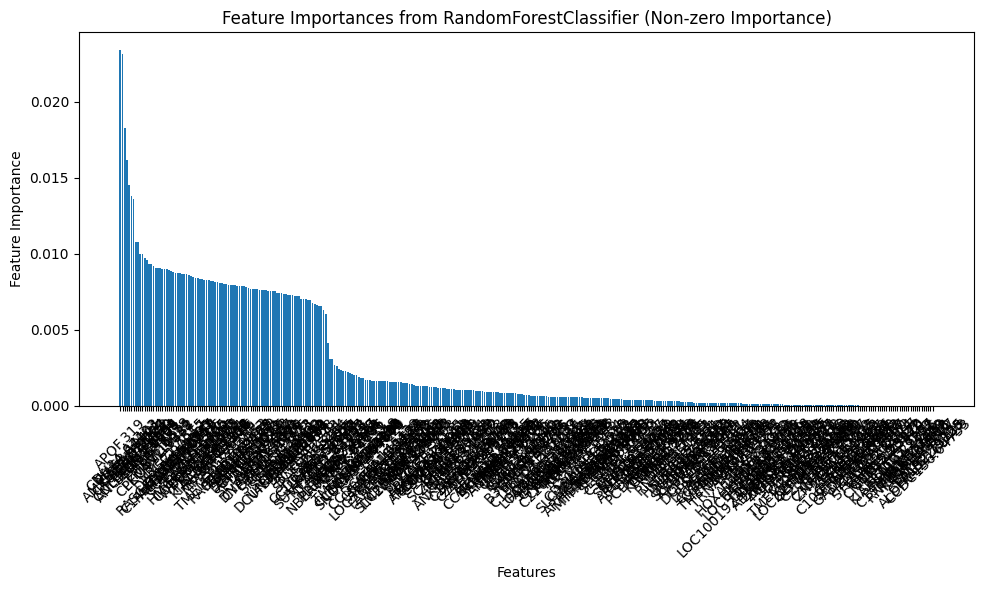

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	20531
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	20531
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	20531
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	20531
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	20531
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	20531
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	20531
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	2050
Rejected: 	18481
Iteration: 	9 / 100
Confirmed: 	367
Tentative: 	1683
Rejected: 	18481
Iteration: 	10 / 100
Confirmed: 	367
Tentative: 	1683
Rejected: 	18481
Iteration: 	11 / 100
Confirmed: 	367
Tentative: 	1683
Rejected: 	18481
Iteration: 	12 / 100
Confirmed: 	398
Tentative: 	1211
Rejected: 	18922
Iteration: 	13 / 100
Confirmed: 	398
Tentative: 	1211
Rejected: 	18922
Iteration: 	14 / 100
Confirmed: 	398
Tentative: 	1211
Rejected: 	18922
Iteration: 	15 / 100
Confirmed: 	398
Tentative: 	121

In [45]:
# feature selection for rna-seq data

# start with random forest classifier
forest = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
forest.fit(rseq_train, status_rseq_train)

feature_importances = forest.feature_importances_

# Sort the features by importance in descending order
sorted_indices = feature_importances.argsort()[::-1]

non_zero_indices = sorted_indices[feature_importances[sorted_indices] > 0]

feature_names = rseq.columns.tolist()

# Print the feature importances
for idx in non_zero_indices:
    print(f"{feature_names[idx]}: {feature_importances[idx]}")

# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(non_zero_indices)), feature_importances[non_zero_indices])
plt.xticks(range(len(non_zero_indices)), [feature_names[i] for i in non_zero_indices], rotation=45)
plt.xlabel("Features")
plt.ylabel("Feature Importance")
plt.title("Feature Importances from RandomForestClassifier (Non-zero Importance)")
plt.tight_layout()
plt.show()


# define Boruta feature selection method
feat_selector_rseq = BorutaPy(forest, n_estimators='auto', verbose=2, random_state=1)

# find all relevant features
feat_selector_rseq.fit(rseq_train, status_rseq_train)


# Zip feature names, decision, and rankings 
feature_ranks = list(zip(feature_names, 
                         feat_selector_rseq.ranking_, 
                         feat_selector_rseq.support_))

for feat in feature_ranks:
    print('Feature: {:<30} Rank: {},  Keep: {}'.format(feat[0], feat[1], feat[2])) 



In [46]:

# call transform() on X to filter it down to selected features
filtered_rseq_train = feat_selector_rseq.transform(rseq_train, return_df=True) # Apply feature selection and return transformed data (for training)

# call transform() on X to filter it down to selected features
filtered_dmeth_train = feat_selector_dmeth.transform(dmeth_train, return_df=True) #Apply feature selection and return transformed data

print(filtered_dmeth_train.shape)

print(filtered_dmeth_train.to_numpy())

print(len(filtered_rseq_train.columns))
# gets 432 features once filtered with Boruta

print(len(filtered_dmeth_train.columns))
# gets 407 features once filtered with Boruta


(286, 407)
[[0.97213621 0.87281373 0.83540238 ... 0.71760979 0.93035544 0.7894736 ]
 [0.89972342 0.82805982 0.17616057 ... 0.53965516 0.54335627 0.72810217]
 [0.92168975 0.42799672 0.28523617 ... 0.45653054 0.912021   0.89458272]
 ...
 [0.95959579 0.89407592 0.81419149 ... 0.74441063 0.84933713 0.9061957 ]
 [0.44186697 0.54745286 0.05707509 ... 0.82393362 0.23470594 0.17866994]
 [0.15995552 0.24917581 0.05434135 ... 0.04050842 0.96191986 0.97115758]]
432
407


In [96]:
### NEURAL NETWORK FOR CANCER STATUS CLASSIFICATION ###
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score


# First, train DNA methylation model
filtered_dmeth_test = feat_selector_dmeth.transform(dmeth_test, return_df=True) # Apply feature selection and return transformed data (for testing)

print("filtered_dmeth_train")
print(filtered_dmeth_train)
print("dmeth_train")
print(dmeth_train)

X_train_tensor = torch.tensor(filtered_dmeth_train.to_numpy(), dtype=torch.float32)
y_train_tensor = torch.tensor(status_dmeth_train, dtype=torch.float32)
X_test_tensor = torch.tensor(filtered_dmeth_test.to_numpy(), dtype=torch.float32)
y_test_tensor = torch.tensor(status_dmeth_test, dtype=torch.float32) 

num_samples = X_train_tensor.shape[0]
input_size = X_train_tensor.shape[1]
hidden_size = 5
num_classes = len(set(status_dmeth_train))

print (num_samples)
print (input_size)
print (hidden_size)
print (num_classes)

filtered_dmeth_train
     cg00033551  cg00084338  cg00123762  cg00150560  cg00347904  cg00417291  \
109    0.972136    0.872814    0.835402    0.917630    0.738583    0.916828   
406    0.899723    0.828060    0.176161    0.337000    0.564942    0.527742   
195    0.921690    0.427997    0.285236    0.607042    0.781429    0.904216   
352    0.682985    0.624745    0.183182    0.406095    0.614938    0.894313   
274    0.969472    0.387576    0.221073    0.372469    0.839150    0.934330   
..          ...         ...         ...         ...         ...         ...   
71     0.978433    0.523402    0.869247    0.141290    0.110253    0.498610   
106    0.230441    0.355867    0.094686    0.817519    0.118385    0.969351   
270    0.959596    0.894076    0.814191    0.914018    0.935917    0.933923   
348    0.441867    0.547453    0.057075    0.201872    0.508778    0.218901   
102    0.159956    0.249176    0.054341    0.785377    0.097282    0.969364   

     cg00446123  cg00582971  c

In [97]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNetwork, self).__init__()
        self.linear_stack= nn.Sequential(
        nn.Linear(input_size, hidden_size),
        nn.ReLU(),
        nn.Linear(hidden_size, num_classes)
        )

    def forward(self, x):
        x = self.linear_stack(x)
        return x

In [98]:
dmeth_model = NeuralNetwork(input_size, hidden_size, num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(dmeth_model.parameters(), lr=0.01)

epochs = 100000

# Training loop
for epoch in range(epochs):
    y_pred = dmeth_model(X_train_tensor)
    loss = criterion(y_pred, y_train_tensor.long()) 
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')




Epoch [100/100000], Loss: 0.4597
Epoch [200/100000], Loss: 0.2541
Epoch [300/100000], Loss: 0.1333
Epoch [400/100000], Loss: 0.0959
Epoch [500/100000], Loss: 0.0802
Epoch [600/100000], Loss: 0.0713
Epoch [700/100000], Loss: 0.0653
Epoch [800/100000], Loss: 0.0608
Epoch [900/100000], Loss: 0.0573
Epoch [1000/100000], Loss: 0.0543
Epoch [1100/100000], Loss: 0.0517
Epoch [1200/100000], Loss: 0.0495
Epoch [1300/100000], Loss: 0.0475
Epoch [1400/100000], Loss: 0.0458
Epoch [1500/100000], Loss: 0.0441
Epoch [1600/100000], Loss: 0.0427
Epoch [1700/100000], Loss: 0.0413
Epoch [1800/100000], Loss: 0.0400
Epoch [1900/100000], Loss: 0.0388
Epoch [2000/100000], Loss: 0.0377
Epoch [2100/100000], Loss: 0.0367
Epoch [2200/100000], Loss: 0.0357
Epoch [2300/100000], Loss: 0.0348
Epoch [2400/100000], Loss: 0.0339
Epoch [2500/100000], Loss: 0.0330
Epoch [2600/100000], Loss: 0.0322
Epoch [2700/100000], Loss: 0.0315
Epoch [2800/100000], Loss: 0.0307
Epoch [2900/100000], Loss: 0.0300
Epoch [3000/100000], Lo

DNA Methylation Neural Network Performance Metrics:
Accuracy: 0.9858156028368794
Recall: 1.0
Precision: 0.8947368421052632
RNA-seq Neural Network Performance Metrics:
Accuracy: 1.0
Recall: 1.0
Precision: 1.0


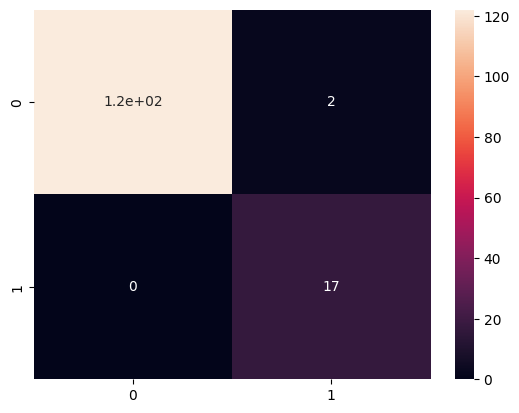

In [99]:
from sklearn.metrics import recall_score, precision_score
# Test the model and calculate accuracy
with torch.inference_mode():
    y_pred = dmeth_model(X_test_tensor)
    predicted_classes = torch.argmax(y_pred, dim=1)
    accuracy = accuracy_score(y_test_tensor.numpy(), predicted_classes.numpy())
    recall = recall_score(y_test_tensor.numpy(), predicted_classes.numpy())
    precision = precision_score(y_test_tensor.numpy(), predicted_classes.numpy())

print("DNA Methylation Neural Network Performance Metrics:")
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)

#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_tensor, predicted_classes)
#print(cm)
sns.heatmap(cm, annot=True)

## test on training data (check for overfitting)
with torch.inference_mode():
    y_pred = dmeth_model(X_train_tensor)
    predicted_classes = torch.argmax(y_pred, dim=1)
    accuracy = accuracy_score(y_train_tensor.numpy(), predicted_classes.numpy())
    recall = recall_score(y_train_tensor.numpy(), predicted_classes.numpy())
    precision = precision_score(y_train_tensor.numpy(), predicted_classes.numpy())

print("RNA-seq Neural Network Performance Metrics:")
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)

In [100]:
# Second, train RNA-seq model
filtered_rseq_test = feat_selector_rseq.transform(rseq_test, return_df=True) # Apply feature selection and return transformed data (for testing)
filtered_status_rseq_test = feat_selector_rseq.transform(rseq_test, return_df=True) # Apply feature selection and return transformed data (for testing)

print("filtered_rseq_train")
print(filtered_rseq_train)
print("rseq_train")
print(rseq_train)

X_train_tensor = torch.tensor(filtered_rseq_train.to_numpy(), dtype=torch.float32)
y_train_tensor = torch.tensor(status_rseq_train, dtype=torch.float32)
X_test_tensor = torch.tensor(filtered_rseq_test.to_numpy(), dtype=torch.float32)
y_test_tensor = torch.tensor(status_rseq_test, dtype=torch.float32) 

num_samples = X_train_tensor.shape[0]
input_size = X_train_tensor.shape[1]
hidden_size = 5
num_classes = len(set(status_rseq_train))

print (num_samples)
print (input_size)
print (hidden_size)
print (num_classes)

filtered_rseq_train
     AADAT.51166  ABCC10.89845  ACAA2.10449  ACAD11.84129   ACADSB.36  \
290     184.3710      178.6981    7727.6982     1857.8528  12747.6954   
109    1642.1488      114.0496   27080.1653     6664.4628  15494.2149   
180     266.3913      458.4409    5034.5896     1953.5364   6933.4022   
193      53.4125      284.8665    1713.1553      407.5173   8939.6637   
157    1111.6857      240.3444   12798.5237     1679.4342   7468.5339   
..           ...           ...          ...           ...         ...   
71       58.2591      869.7738    1729.2666      479.0953   6135.7094   
106      15.6454      162.3213   10037.1905     1565.1941   1749.6798   
270      63.0771      332.4331   10458.2889     1629.7746   5865.0293   
348      52.4389      208.3383    4804.0628     1023.2668   4801.7007   
102     879.0799      220.0808   18305.8750     3776.1890   9022.0703   

       ACAT1.38  ACBD6.84320  ADAM15.8751  ADAMTS13.11093    ADH4.127  ...  \
290   8475.3936     326.1

In [101]:
rseq_model = NeuralNetwork(input_size, hidden_size, num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(rseq_model.parameters(), lr=0.00005)

epochs = 100000

# Training loop
for epoch in range(epochs):
    y_pred = rseq_model(X_train_tensor)
    loss = criterion(y_pred, y_train_tensor.long()) 
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [100/100000], Loss: 740.8077
Epoch [200/100000], Loss: 351.2429
Epoch [300/100000], Loss: 52.4176
Epoch [400/100000], Loss: 20.3525
Epoch [500/100000], Loss: 14.5079
Epoch [600/100000], Loss: 13.0252
Epoch [700/100000], Loss: 10.1117
Epoch [800/100000], Loss: 8.1735
Epoch [900/100000], Loss: 6.8201
Epoch [1000/100000], Loss: 5.7341
Epoch [1100/100000], Loss: 4.7550
Epoch [1200/100000], Loss: 3.7640
Epoch [1300/100000], Loss: 2.8272
Epoch [1400/100000], Loss: 1.8685
Epoch [1500/100000], Loss: 0.8627
Epoch [1600/100000], Loss: 0.3641
Epoch [1700/100000], Loss: 0.0784
Epoch [1800/100000], Loss: 0.0001
Epoch [1900/100000], Loss: 0.0000
Epoch [2000/100000], Loss: 0.0000
Epoch [2100/100000], Loss: 0.0000
Epoch [2200/100000], Loss: 0.0000
Epoch [2300/100000], Loss: 0.0000
Epoch [2400/100000], Loss: 0.0000
Epoch [2500/100000], Loss: 0.0000
Epoch [2600/100000], Loss: 0.0000
Epoch [2700/100000], Loss: 0.0000
Epoch [2800/100000], Loss: 0.0000
Epoch [2900/100000], Loss: 0.0000
Epoch [3000/10

RNA-seq Neural Network Performance Metrics:
Accuracy: 0.9424460431654677
Recall: 0.625
Precision: 0.8333333333333334
[[121   2]
 [  6  10]]
RNA-seq Neural Network Performance Metrics:
Accuracy: 1.0
Recall: 1.0
Precision: 1.0


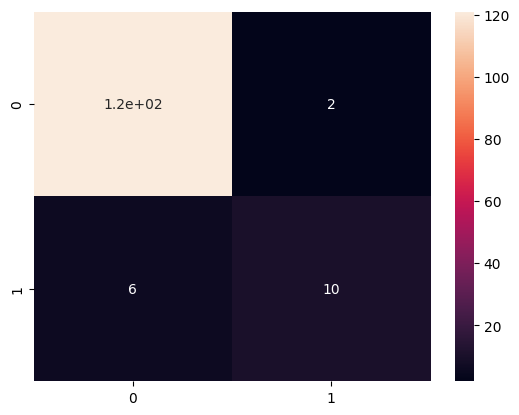

In [102]:
from sklearn.metrics import recall_score, precision_score
# Test the model and calculate accuracy
with torch.inference_mode():
    y_pred = rseq_model(X_test_tensor)
    predicted_classes = torch.argmax(y_pred, dim=1)
    accuracy = accuracy_score(y_test_tensor.numpy(), predicted_classes.numpy())
    recall = recall_score(y_test_tensor.numpy(), predicted_classes.numpy())
    precision = precision_score(y_test_tensor.numpy(), predicted_classes.numpy())

print("RNA-seq Neural Network Performance Metrics:")
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)

#Confusion Matrix - verify accuracy of each class
cm = confusion_matrix(y_test_tensor, predicted_classes)
print(cm)
sns.heatmap(cm, annot=True)


## test on training data (check for overfitting)
with torch.inference_mode():
    y_pred = rseq_model(X_train_tensor)
    predicted_classes = torch.argmax(y_pred, dim=1)
    accuracy = accuracy_score(y_train_tensor.numpy(), predicted_classes.numpy())
    recall = recall_score(y_train_tensor.numpy(), predicted_classes.numpy())
    precision = precision_score(y_train_tensor.numpy(), predicted_classes.numpy())

print("RNA-seq Neural Network Performance Metrics:")
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)

#Confusion Matrix - verify accuracy of each class
#cm = confusion_matrix(y_train_tensor, predicted_classes)
#print(cm)
#sns.heatmap(cm, annot=True)

In [103]:
## Load in the mystery datasets
mys_liver_dna_meth = pd.read_csv('mystery_dna-meth.csv')
mys_liver_gene_expr = pd.read_csv('mystery_gene-expr.csv')

df_dna_meth_mys = pd.DataFrame(mys_liver_dna_meth)
df_gene_expr_mys = pd.DataFrame(mys_liver_gene_expr)

df_dna_meth_mys = df_dna_meth_mys.dropna(axis=1)  # Dropping columns with missing values in DNA methylation dataset
df_gene_expr_mys = df_gene_expr_mys.dropna(axis=1)  # Dropping columns with missing values in gene expression dataset

# Filter columns in DNA methylation data that have less than or equal to 90% zero values
df_dna_meth_filtered_mys = df_dna_meth_mys.loc[:, (df_dna_meth_mys == 0).mean() <= 0.90]

# Filter columns in gene expression data that have less than or equal to 90% zero values
df_gene_expr_filtered_mys = df_gene_expr_mys.loc[:, (df_gene_expr_mys == 0).mean() <= 0.90]

# Drop the label column before scaling
features_dna_mys = df_dna_meth_filtered_mys.drop(columns=[df_dna_meth_filtered_mys.columns[1]])  # Dropping the label column from DNA methylation data
features_gene_mys = df_gene_expr_filtered_mys.drop(columns=[df_gene_expr_filtered_mys.columns[1]])  # Dropping the label column from gene expression data

# Set the far left column as the index (assuming it's is an identifier) ---- double check
features_dna_mys.set_index(features_dna_mys.columns[0], inplace=True)
features_gene_mys.set_index(features_gene_mys.columns[0], inplace=True)

# Separate the label column
label_column_dna_mys = df_dna_meth_filtered_mys.iloc[:, 1]  # Extracting the label column from the DNA methylation data
label_column_gene_mys = df_gene_expr_filtered_mys.iloc[:, 1]  # Extracting the label column from the gene expression data

# Ensure that only numeric columns are selected for scaling
# pd.to_numeric will attempt to convert the columns to numeric types, coercing invalid values to NaN.
features_dna_mys = features_dna_mys.apply(pd.to_numeric, errors='coerce')  # Convert DNA methylation data to numeric (NaN for invalid values)
features_gene_mys = features_gene_mys.apply(pd.to_numeric, errors='coerce')  # Convert gene expression data to numeric (NaN for invalid values)

# Re-drop any columns that still contain non-numeric values after conversion
features_dna_mys = features_dna_mys.dropna(axis=1)  # Drop any remaining non-numeric (NaN) columns in DNA methylation data
features_gene_mys = features_gene_mys.dropna(axis=1)  # Drop any remaining non-numeric (NaN) columns in gene expression data

In [104]:
# Apply Min-Max scaling manually to the features
features_dna_scaled_mys = min_max_scaling(features_dna_mys)  # Apply Min-Max scaling to DNA methylation data
features_gene_scaled_mys = min_max_scaling(features_gene_mys)  # Apply Min-Max scaling to gene expression data
# Convert back to DataFrames
df_dna_meth_scaled_mys = pd.DataFrame(features_dna_scaled_mys, columns=features_dna_mys.columns)  # DNA methylation scaled data
df_gene_expr_scaled_mys = pd.DataFrame(features_gene_scaled_mys, columns=features_gene_mys.columns)  # Gene expression scaled data

# Add the label column back to the scaled DataFrames
df_dna_meth_scaled_mys['Label'] = label_column_dna_mys.values  # Add the label column back to the DNA methylation scaled data
df_gene_expr_scaled_mys['Label'] = label_column_gene_mys.values  # Add the label column back to the gene expression scaled data

In [105]:
# Test the model and calculate accuracy (DNA meth data)
# store values for liver cancer status (Y)
status_dmeth_mys = df_dna_meth_scaled_mys['Label'].values
status_rseq_mys = df_gene_expr_scaled_mys['Label'].values

# Encoding categorical data as 0 = healthy 1 = cancer (X)
labelencoder = LabelEncoder()
encoded_status_dmeth_mys = labelencoder.fit_transform(status_dmeth_mys)
encoded_status_rseq_mys = labelencoder.fit_transform(status_rseq_mys)


# store values for (epi)genetic data
numeric_only_d_mys = mys_liver_dna_meth.select_dtypes(include=['number'])
numeric_only_r_mys = mys_liver_gene_expr.select_dtypes(include=['number'])
dmeth_mys = mys_liver_dna_meth[numeric_only_d.columns]
rseq_mys = mys_liver_gene_expr[numeric_only_r.columns]

# Re-drop any columns that still contain non-numeric values after conversion
#dmeth_mys = dmeth_mys.dropna(axis=1)  # Drop any remaining non-numeric (NaN) columns in DNA methylation data
#rseq_mys = rseq_mys.dropna(axis=1)  # Drop any remaining non-numeric (NaN) columns in gene expression data

# find all relevant features
filtered_dmeth_mys = feat_selector_dmeth.transform(dmeth_mys, return_df=True) # Apply feature selection and return transformed data (for testing)
filtered_status_deth_mys = feat_selector_dmeth.transform(dmeth_mys, return_df=True) # Apply feature selection and return transformed data (for testing)

filtered_rseq_mys = feat_selector_rseq.transform(rseq_mys, return_df=True) # Apply feature selection and return transformed data (for testing)
filtered_status_rseq_mys = feat_selector_rseq.transform(rseq_mys, return_df=True) # Apply feature selection and return transformed data (for testing)

X_dmeth_tensor = torch.tensor(filtered_dmeth_mys.to_numpy(), dtype=torch.float32)
y_dmeth_tensor = torch.tensor(encoded_status_dmeth_mys, dtype=torch.float32)

X_rseq_tensor = torch.tensor(filtered_rseq_mys.to_numpy(), dtype=torch.float32)
y_rseq_tensor = torch.tensor(encoded_status_rseq_mys, dtype=torch.float32)

DNA methylation Neural Network Performance Metrics:
Accuracy: 0.5973684210526315
Recall: 0.2
Precision: 0.9743589743589743


<Axes: >

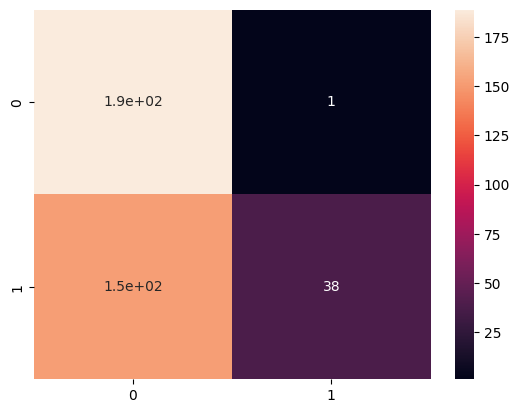

In [106]:
# Test DNA meth model
with torch.inference_mode():
    y_pred = dmeth_model(X_dmeth_tensor)
    predicted_classes = torch.argmax(y_pred, dim=1)
    accuracy = accuracy_score(y_dmeth_tensor.numpy(), predicted_classes.numpy())
    recall = recall_score(y_dmeth_tensor.numpy(), predicted_classes.numpy())
    precision = precision_score(y_dmeth_tensor.numpy(), predicted_classes.numpy())

print("DNA methylation Neural Network Performance Metrics:")
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)

#Confusion Matrix - verify accuracy of each class
cm = confusion_matrix(y_dmeth_tensor, predicted_classes)
#print(cm)
sns.heatmap(cm, annot=True)

RNA-seq Neural Network Performance Metrics:
Accuracy: 0.5894736842105263
Recall: 0.17894736842105263
Precision: 1.0


<Axes: >

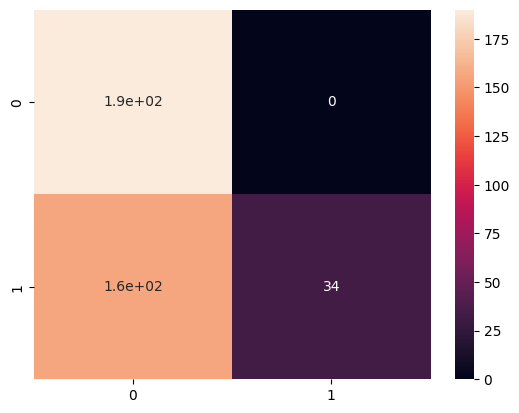

In [107]:
# Test RNA-seq model

with torch.inference_mode():
    y_pred = rseq_model(X_rseq_tensor)
    predicted_classes = torch.argmax(y_pred, dim=1)
    accuracy = accuracy_score(y_rseq_tensor.numpy(), predicted_classes.numpy())
    recall = recall_score(y_rseq_tensor.numpy(), predicted_classes.numpy())
    precision = precision_score(y_rseq_tensor.numpy(), predicted_classes.numpy())

print("RNA-seq Neural Network Performance Metrics:")
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)

#Confusion Matrix - verify accuracy of each class
cm = confusion_matrix(y_rseq_tensor, predicted_classes)
#print(cm)
sns.heatmap(cm, annot=True)